# Lekce 1

V této lekci projdeme následující témata:
- opakování dotazů, agregací,
- `iloc`,
- vizualizace složené z více sérií

Ke zpracování dat využijeme moduly  `pandas` a ke tvorbě vizualizací modul `matplotlib` a jeho nadstavbu `seaborn`.

V rámci lekce budeme využívat datový soubor [Hotel Booking Demand EDA/ Data Visualisation](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand).

Popis dat je ve článku [Hotel booking demand datasets
](https://www.sciencedirect.com/science/article/pii/S2352340918315191) Soubor obsahuje informace o rezervacích hotelů ze serveru [Booking.com](booking.com).

## Načtení dat

Na začátku načteme data. Obvykle vkládáme na začátek programu i import modulů, i když je používáme až později. Důvodem je větší přehlednost programu.

Základní datová struktura, kterou modul `pandas` používá, je tabulka (`DataFrame`). `DataFrame` je obdobou klasické tabulky, kterou si můžeme vytvořit v databázi, Excelu nebo třeba i na obyčejnou tabuli.

In [2]:
import pandas
import matplotlib.pyplot as plt
import seaborn

data = pandas.read_csv("hotel_bookings.csv")

## Head a iloc

Pokud dostaneme ke zpracování nějaká nová data, začínáme často tím, že si prohlédneme jejich strukturu. K tomu nám stačí několik prvních řádků, které získáme pomocí metody `head()`.

U `DataFrame` platí, že každý sloupeček má svůj název. Pokud načítáme data ze souboru, obvykle najdeme názvy sloupečků v prvním řádku souboru.

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


U rozsáhlého souboru se můžeme podívat na seznam sloupců pomocí vlastnosti `columns`.

In [4]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Výběr jednoho sloupce

Často potřebujeme z tabulky získat jeden konkrétní sloupec. Zápis níže nám sloupec vrátí jako tzv. sérii (`Series`). Uvažujme například, že chceme vytvořit model, který má predikovat, zda potenciální uživatel(ka) rezervaci zruší. V takovém případě budeme potřebovat vložit sloupec `is_canceled` do série.

In [16]:
company = data["is_canceled"]
company

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64

### Výběr více sloupců

Pokud mají data velké množství sloupců a my chceme data zjednodušit a zbavit sloupců, které nepotřebujeme, můžeme použít dotaz (`query`). Zde jsou důležité **dva páry hranatých závorek**. Tím modulu `pandas` říkáme, že chceme výsledek uložit jako tabulku (`DataFrame`).

In [5]:
data_selected_columns = data[["is_canceled", "arrival_date_year", "country", "market_segment"]]
data_selected_columns

,is_canceled,arrival_date_year,country,market_segment
0,0,2015,PRT,Direct
1,0,2015,PRT,Direct
2,0,2015,GBR,Direct
3,0,2015,GBR,Corporate
4,0,2015,GBR,Online TA
...,...,...,...,...
119385,0,2017,BEL,Offline TA/TO
119386,0,2017,FRA,Online TA
119387,0,2017,DEU,Online TA
119388,0,2017,GBR,Online TA


### Vlastnost iloc

Obecnějším způsobem, jak získat určité určité řádky na základě jich čísel, je `iloc`. Nejedná se o funkci, proto při použití nepíšeme kulaté závorky, ale používáme hranaté. Do závorek napíšeme, které řádky nás zajímají. Pokud nás například zajímají řádky 5 až 9, napíšeme `.iloc[5:10]`. Tento poněkud bizarní zápis je dán tím, že za dvojtečku píšeme číslo prvního řádku, který ve vybraných řádcích **není**.

Stejnou logiku používá samotný jazyk Python u řezů (slicing).

In [6]:
data.iloc[5:10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


### Unikátní hodnoty

V datech často existují tzv. kategoriální sloupce. To jsou sloupce, které obsahují textové hodnoty, která řadí data do určitých kategorií. Například sloupec `deposit_type` rozděluje rezervace dle poskytnuté zálohy. Pomocí metody `unique()` zjistíme, že celkem existují tři kategorie:

* *No Deposit* - žádná záloha,
* *Refundable* - záloha ve výši části ceny pobytu,
* *Non Refund* - záloha v plné výši ceny pobytu.

In [8]:
data["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

Podobně se můžeme podívat například na sloupec `hotel`.

In [9]:
data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

## Dotazy

Při práci s daty potřebujeme dotazy. Dotaz znamená, že vybereme určité řádky v závilosti na hodnotách některých sloupců.

- Děláme predikci a náš model pro některé řádky nefunguje. Chceme se na tyto řádky podívat.
- Chceme do analýzy zařadit jen některé data. Pokud je například naším zákazníkem firma, která provozuje městské hotely, vyřadíme hotely v rezortech.

Vyzkoušíme si výběr městských hotelů.

In [ ]:
data_mestske = data[data["City Hotel"] == 1]

Můžeme třeba uvažovat i případy, kdy uživatelé naplatili žádnou zálohu. Pokud uživatel zaplatil zálohu, tak ani nemá důvod rušit rezervaci, protože peníze zpět stejně nedostane.

In [19]:
data_mestske_bez_zalohy = data[(data["deposit_type"] == "No Deposit") & (data["hotel"] == "City Hotel")]
data_mestske_bez_zalohy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,No Deposit,9.0,NaN,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-04-02


Pomocí vlastnosti shape se můžeme podívat, kolik dat v našem výběru je.

In [18]:
data_mestske_bez_zalohy.shape

(66442, 32)

## Vizualizace

Vizualizace jsou užitečné v řadě případů. Pomohou nám předat zprávu publiku nebo umožní snadno získat přehled o hodnotách v jednotlivých sloupcích a vztazích mezi nimi.

Pro vizualizace existuje řada modulů. Vyzkoušíme si modul `seaborn`, který je postavený na modulu `matplotlib`, ale umí řadu vizualizací vytvořit jednodušeji. Začněme s typem grafu `countplot`, což je sloupcový graf, kde výška sloupců je daná počtem řádků v jednotlivých kategoriích.

<Axes: xlabel='hotel', ylabel='count'>

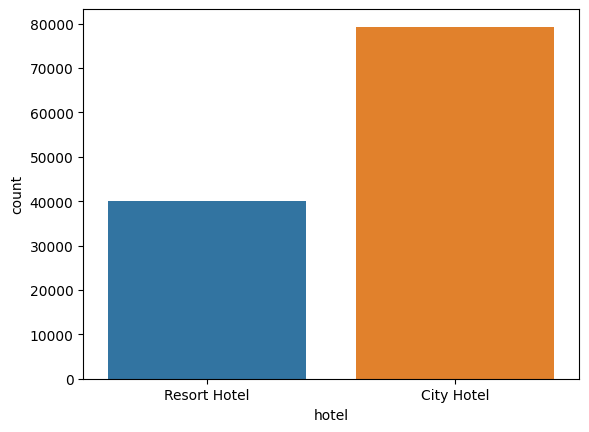

In [21]:
seaborn.countplot(data=data, x="hotel")

Zkusme nyní použít parametr `hue`, který umožní přidat do vizualizace další kategorickou proměnnou. Zobrazme si pro každý typ hotelu počet zrušených a nezrušených rezervací.

<Axes: xlabel='hotel', ylabel='count'>

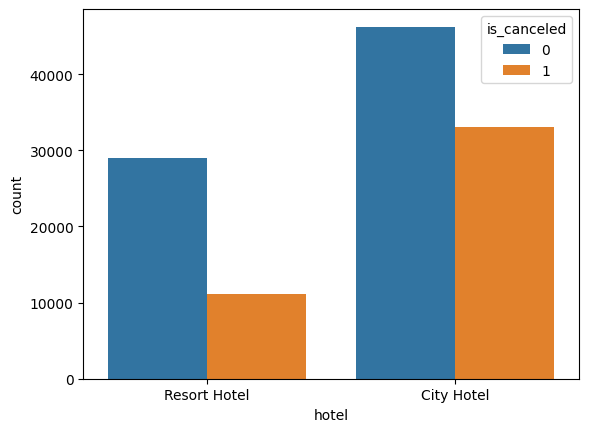

In [22]:
seaborn.countplot(data=data, x="hotel", hue="is_canceled")

U některých kategorií nám nemusí vyhovovat výchozí způsob řazení. Například u měsíců by bylo logické, aby byly v grafu seřazeny stejně jako v kalendáři. K tomu můžeme využít parametr `order`, kterému dáme jako parametr seznam jednotlivých kategorií v pořadí, v jakém mají být zobrazeny.

<Axes: xlabel='arrival_date_month', ylabel='count'>

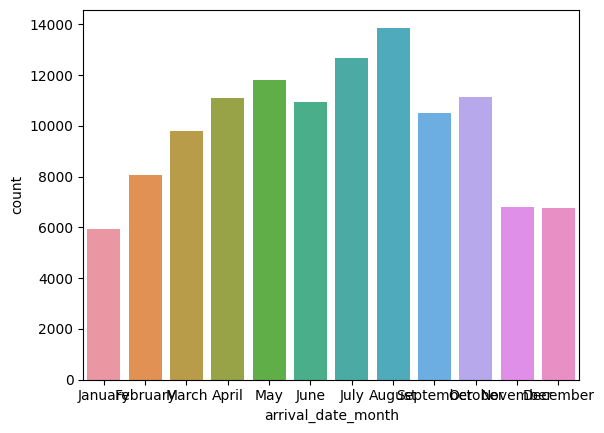

In [11]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
seaborn.countplot(x=data['arrival_date_month'], order=month_sorted)


Tento graf má určité formální nedostatky. Především se překrývají popisky na ose *x*.

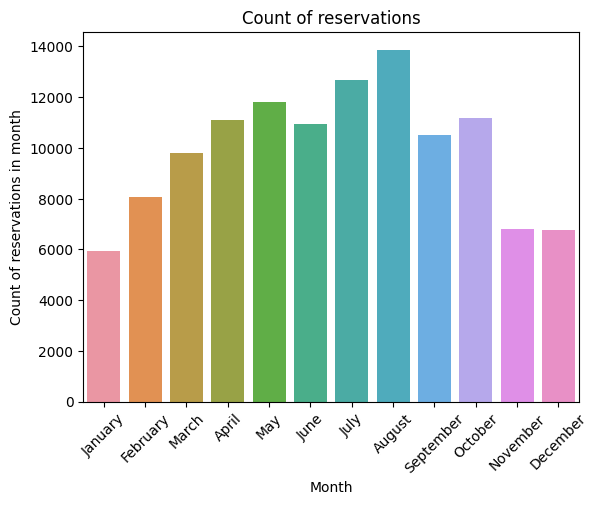

In [36]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
ax = seaborn.countplot(x=data['arrival_date_month'], order=month_sorted)

ax.set(xlabel="Month", ylabel="Count of reservations in month", title="Count of reservations")
ax.tick_params(axis='x', rotation=45)

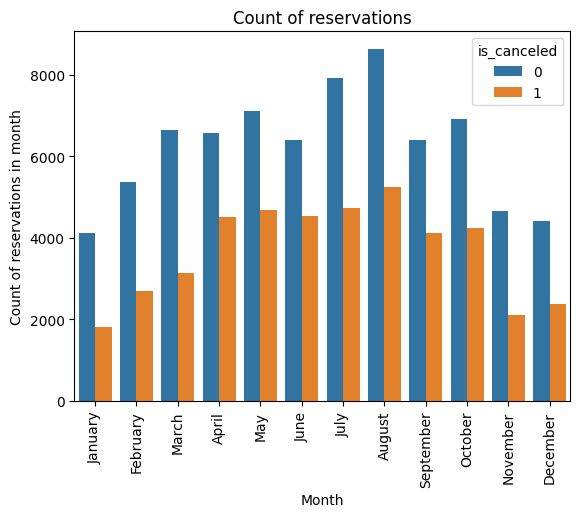

In [35]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
ax = seaborn.countplot(data=data, x='arrival_date_month', hue="is_canceled", order=month_sorted)

ax.set(xlabel="Month", ylabel="Count of reservations in month", title="Count of reservations")
ax.tick_params(axis='x', rotation=45)
